# Forecast the Future:
## A tener en cuenta: 'trend, seasonality, stationarity, autocorrelation'

## What Is Stastionary?
TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

### How to remove Stationarity?
    1) Constant mean
    2) Constant Variance
    3) Autocovariance that does not depend on time
    
### Tests to Check Stationarity:
    1)Rolling Statistics
    Plot the moving average or moving variance and see if it varies with time.
    More of a visual technique.
    
    2) ADCF Test:
    Null hypothesis is that the TS is non-stationary.
    The test results comprise of Test Statistic and some Critical values.
    
### ARIMA MODEL:
<h4> AR + MA: </h4>   
AR --> Auto Regressive <br>
+ <br>
MA --> Moving Average <br>

<h4> AR + I + MA MODEL </h4>

AR --> P = autoregressive lags <br>
MA --> Q = moving average <br>
I --> INTEGRATION (d = order of differentiation)

## Conceptos básicos:

### Media:
En matemáticas y estadística, la media aritmética, también llamada promedio o simplemente media, se obtiene como la suma de un conjunto de valores dividida entre el número total de sumandos.

Línea que corta por la mitad los ejes, osea media de Y y media de X:
Media constante es una gráfica con una función en linea recta, sin pendiente. Puede ser una media constante y que vaya haciendo subidas y bajadas la función, tipo el coseno, pero no tiene pendiente es la misma todo el rato.

### Covarianza:
En probabilidad y estadística, la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión.

Para medir o cuantificar la relación entre dos variables comenzamos por tener presente que:
   - Si las 2 variables están relacionadas y es positiva la relación --> los datos estarán o encima o por debajo de la media de las dos variables a la vez.
   
   - Si las 2 variables están relacionadas y es negativa --> los datos estarán por encima de la media en una variable y por debajo de la media en la otra.
   
   - Si las dos variables no están relacionadas --> Estarán repartidos los datos, habrá datos tanto por encima y por debajo de las dos medias, están los datos dispersos.
   
### Autocovarianza:
La autocovarianza es un estadístico que permite medir la covarianza de un proceso estocástico en diferentes puntos de la línea temporal.

En otras palabras, la autocovarianza es la covarianza de un proceso estocástico en diferentes momentos del tiempo.

El concepto de la autocovarianza está estrechamente ligado a la autocorrelación. La autocorrelación pretende medir la inercia o tendencia de una serie temporal, es decir, ver qué grado de dependencia muestran los datos de un momento en el tiempo con otro momento en el tiempo. La variable bajo observación sigue siendo el proceso estocástico. Calcularemos la autocovarianza respecto al pasado, ya que no conocemos el valor futuro de un proceso estocástico.

## Conceptos a considerar importantes:

### Conceptos preliminares: Series estacionarias y series no estacionarias:

Se dice que una serie temporal es estacionaria cuando su distribución y sus parámetros no varían con
tiempo. <br>
<br>
En términos más concretos, la media y la varianza de una serie estacionaria no cambian con el tiempo.
tiempo, ni siguen una tendencia.

### Conceptos preliminares: Heteroscedasticidadmo homocedasticidad de las series temporales:

La heteroscedasticidad es una condición en la que la varianza del error no es constante en la
variable independiente. Mientras que la homocedasticidad es una condición en la que la varianza del error es
constante en cualquier condición de la variable independiente. <br>
<br>
El supuesto de homocedasticidad es muy importante en términos del modelo de regresión lineal,
el resultado de la regresión lineal será poco fiable si no se cumple este supuesto.

Heteroscedasticidad --> Varianza (y/X) crece con la X, se dispersan los puntos de arriba abajo en el eje X <br>
Homocedasticidad --> Varianza (y/X) = constante

### Conceptos preliminares: Autocorrelación Time Series:

La autocovarianza se define como la covarianza entre el valor actual (xt) con el valor anterior (xt-1) y el valor actual (xt) con (xt-2). Y se denota como Υ. Aquí la Media no cambiará si se trata de una serie temporal estacionaria. <br> 

La autocovarianza (auto significa sí mismo) de (xt) y (xt-1) se define como la covarianza entre la misma variable con valores diferentes. <br> 

Caso especial, k=0 la covarianza se convierte en varianza, y k se se llama lags. <br> 

La autocovarianza se define como la covarianza entre el valor actual (xt) con el  valor anterior (xt-1) y el valor actual (xt) con (xt-2). Y se denota como Υ. Aquí la Media no cambiará si se trata de una serie temporal estacionaria. 

## Conceptos preliminares: Componentes de una Serie temporal- Tendencia:
- Estacionalidad. <br> 

- Cíclico. <br> 

- Irregularidad. <br> 

- Tendencia: En la que no hay un intervalo fijo y cualquier divergencia dentro del conjunto de datos dado es una línea de tiempo continua. La tendencia sería Negativa o Positiva o Tendencia Nula. <br> 

- Estacionalidad: En la que se producen desplazamientos regulares o de intervalo fijo dentro del conjunto de datos en una línea de tiempo continua. Sería curva de campana o diente de sierra. <br> 

- Cíclica: En la que no hay un intervalo fijo, incertidumbre en el movimiento y su patrón. <br> 

- Irregularidad: Situaciones/eventos/escenarios inesperados y picos en un lapso de tiempo corto. <br> 

#### Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 6)

In [2]:
dataset = pd.read_csv('./data/AirPassengers.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


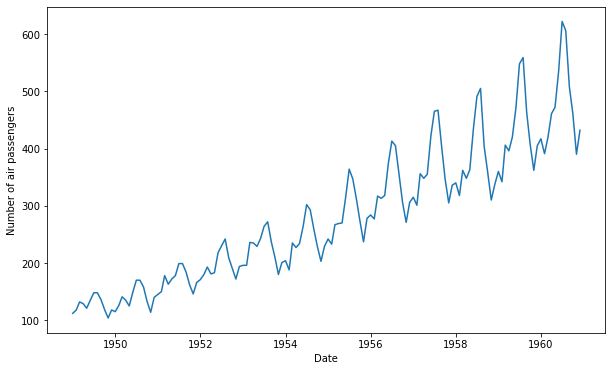

In [4]:
## plot graph

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

Vemos que hay una tendencia positiva, que aumenta y no es estacionaria porque vemos que la media no es constante, de ahí que la media no sea la misma, además presenta una covarianza con relación positiva. <br>
Esta función es heterocedastica porque vemos que la varianza(y/X) aumenta conforme X.

In [6]:
#Determining rolling statistics:
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


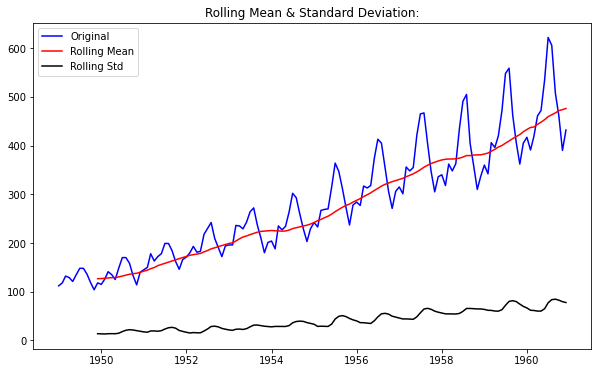

In [7]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation:')
plt.show(block=False)

In [11]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


p-value tendría que ser más baja, y critical value más alto

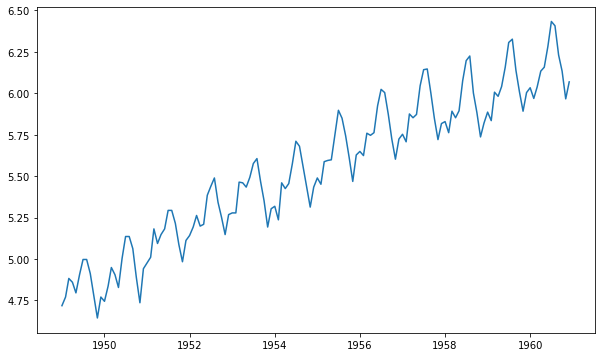

In [12]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

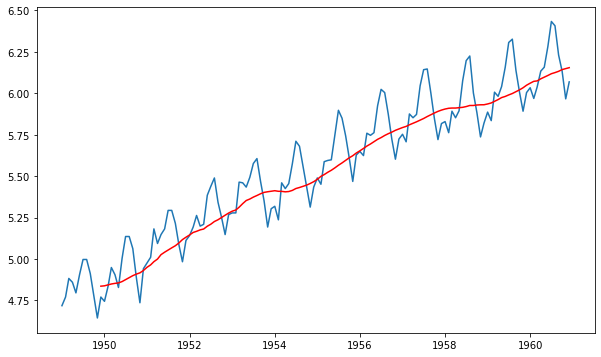

In [15]:
#Determining rolling statistics:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

No es estacionaria porque vemos que los datos se están moviendo con el tiempo.

In [19]:
datasetLogScaleMinusMovingAvergae = indexedDataset_logScale - movingAverage #Lo hacemos stationary
#datasetLogScaleMinusMovingAvergae.head(12)

#remove nan values:
datasetLogScaleMinusMovingAvergae.dropna(inplace=True)
datasetLogScaleMinusMovingAvergae.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    #plot rolling statistic:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standart Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

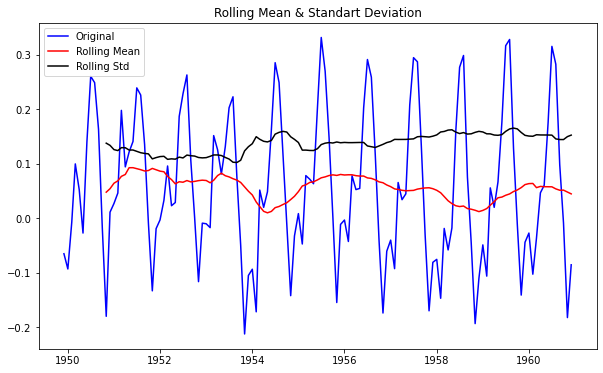

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
test_stationarity(datasetLogScaleMinusMovingAvergae)

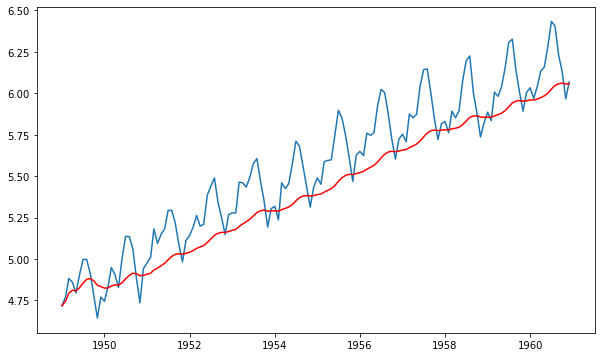

In [22]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

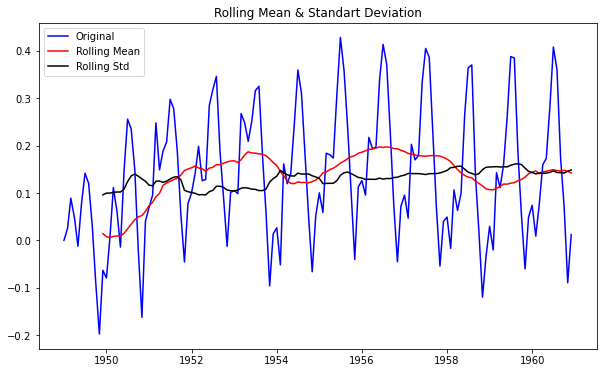

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [23]:
datasetLogScaleMinusMovingExponentialDecayAverage  = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

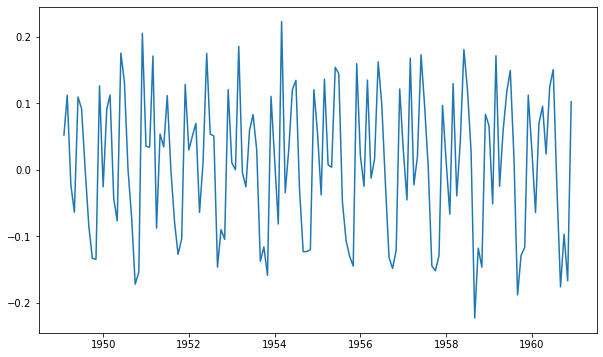

In [24]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

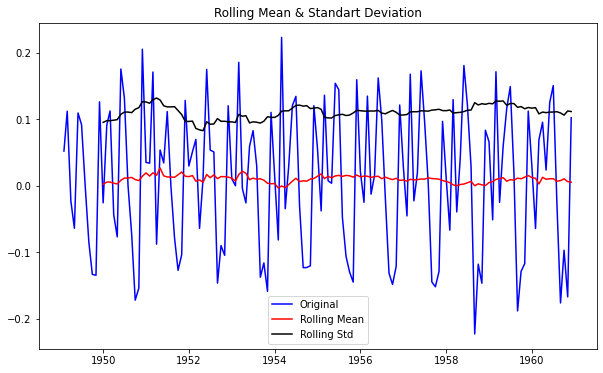

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [25]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

Ahora es estacionario, podemos ver que la media y std son planas, osea constante

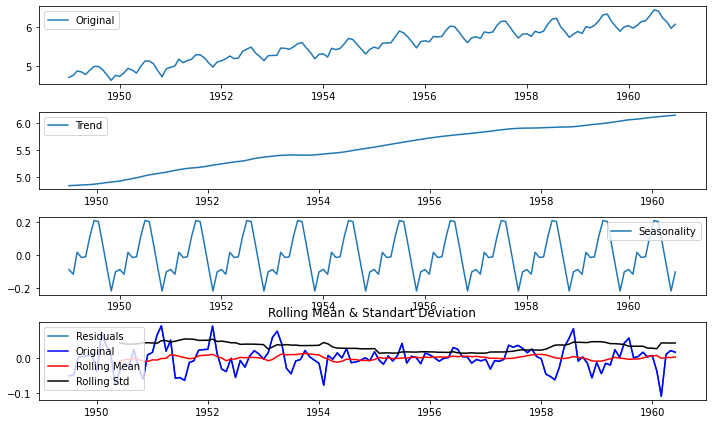

Results of Dickey-Fuller Test:


KeyError: '#Passengers'

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

descomposedLogData = residual
descomposedLogData.dropna(inplace=True)
test_stationarity(descomposedLogData)

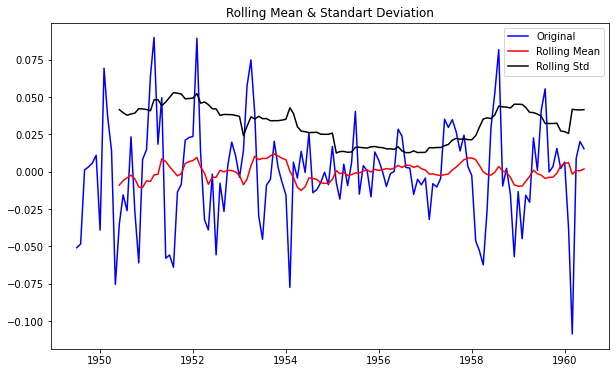

Results of Dickey-Fuller Test:


KeyError: '#Passengers'

In [27]:
descomposedLogData = residual
descomposedLogData.dropna(inplace=True)
test_stationarity(descomposedLogData)